In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import urllib.request
# import simplejson
from cluster_model import ClusterModel
from datetime import timedelta
import pickle
import seaborn as sns

# First Part

In [4]:
with open('/Users/Timothy/Documents/CSUREMM-main/data/data.pickle', 'rb') as f:
    station_data = pickle.load(f)

In [5]:
import os
print(os.getcwd())


/Users/Timothy/Documents/CSUREMM-main


36 horizontal squares and 51 vertical squares. Total squares: 1836


<Axes: title={'center': '10:00:00'}>

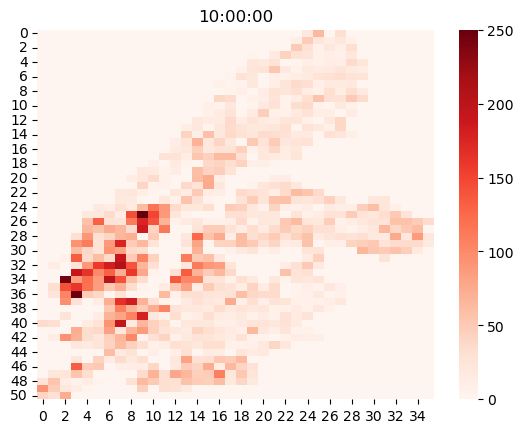

In [6]:
cluster_model = ClusterModel(station_data=station_data, in_transit=[], tph=4)
horizontal_squares, vertical_squares, clusters = cluster_model.cluster_stations(0.005)
cluster_model.init_clusters()
cluster_model.init_state(path='/Users/Timothy/Documents/CSUREMM-main/data/station_data/status_at_time/2024_6_21_10:17.csv', time=timedelta(hours=10))
cluster_model.show_bikes()

# num_stations = [len(cluster) for cluster in clusters]
# sns.heatmap(np.array(num_stations).reshape((vertical_squares, horizontal_squares)))

# Playing Around w/ Graphing

In [7]:
lons = []
lats = []

for station in cluster_model.station_data.keys():
    lons.append(station_data[station]['lon'])
    lats.append(station_data[station]['lat'])

min_lat = min(lats)
max_lat = max(lats)
min_lon = min(lons)
max_lon = max(lons)

def shift(x,y):
    x1 = -1 + ((x - min(lons)) * 2 / (max(lons)-min(lons)))
    y1 = -1 + ((y - min(lats)) * 2 / (max(lats)-min(lats)))  
    return(x1, y1)

In [8]:
for station in cluster_model.station_data.keys():
    lon = station_data[station]['lon']
    lat = station_data[station]['lat']
    print(shift(lon, lat))

(0.6475516254292843, -0.012219406987582726)
(0.20347617223270298, 0.08026616830577704)
(-0.6584051912355285, -0.5114766718755825)
(-0.7837459962350561, -0.4159936187891389)
(-0.5341810815524324, -0.4913742927127549)
(0.20340912894508834, 0.6073866803043908)
(-0.9852027982267842, -0.5906207420569619)
(-0.6711717581173569, -0.48344856724464025)
(-0.7290037848169596, -0.23278425833483907)
(-0.44025475826870986, -0.6009030150589656)
(-0.3600375535772765, -0.6855000203322424)
(-0.5021355126565468, -0.11047082579101275)
(-0.14650987310495134, -0.28459526776551847)
(0.17484423147341088, -0.450884530896118)
(0.17153050139206028, -0.162007354887704)
(-0.4629868008026575, -3.324289076367393e-05)
(-0.7200557844166147, -0.1423941047279963)
(-0.3807794041153647, -0.07594964837044649)
(0.11860878420557297, 0.6262978776402457)
(0.30139683945035656, 0.7020067791206979)
(0.13824011914674728, -0.013566371100825148)
(0.5940999306098678, -0.10802604319983755)
(-0.06592556417850903, -0.14747451092544883)
(

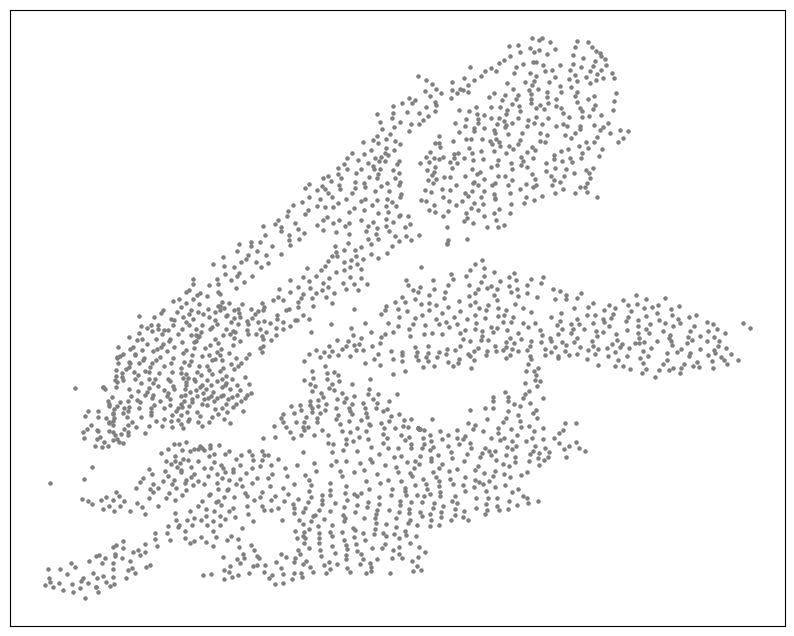

In [12]:
import matplotlib.pyplot as plt
import networkx as nx

stations = [station for station in cluster_model.station_data.keys()]
positions = {}
for station in stations:
    lon = station_data[station]['lon']
    lat = station_data[station]['lat']
    x,y = shift(lon, lat)
    positions[station] = (x,y)
    
G = nx.DiGraph()
for station in stations:
    G.add_node(station)
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G, positions, node_size=5, node_color='gray')

In [14]:
from integer_programming import create_model

start_levels, optimal_levels = {}, {}
for station in stations:
    start_levels[station] = 0
    optimal_levels[station] = 0

start_levels['31 St & Astoria Blvd'] = 3
optimal_levels['Walton Ave & E 168 St'] = 3

neighbors = {}
for s in stations:
    limit = 0.3
    neighbors[s] = [s1 for s1 in stations if np.linalg.norm(np.array(positions[s] - np.array(positions[s1]))) < 0.05]

T = 20
K = 1
L = 3

model = create_model(T,K,L, stations, start_levels, optimal_levels, positions, neighbors)

Restricted license - for non-production use only - expires 2025-11-24


In [15]:
model.optimize()

Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 17.7.0 17G14042)

CPU model: Intel(R) Core(TM) i5-4250U CPU @ 1.30GHz
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads



GurobiError: Model too large for size-limited license; visit https://gurobi.com/unrestricted for more information

# Back to Normal

10:15:00
955
376
29
-------------------


FileNotFoundError: [Errno 2] No such file or directory: '/Users/Timothy/Documents/CSUREMM-main/images/36900.0.png'

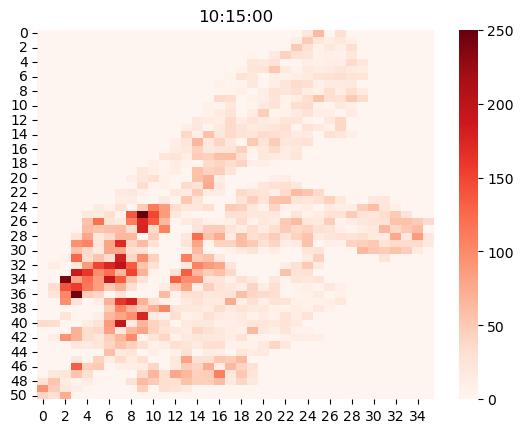

In [11]:
start_time = timedelta(hours=10)
end_time = timedelta(hours=58)
while start_time < end_time:
    cluster_model.sim()
    start_time += timedelta(minutes=15)
    print(cluster_model.curr_time)
    print(len(cluster_model.in_transit))
    print(cluster_model.failures)
    print(cluster_model.critical_failures)
    print('-------------------')
    cluster_model.show_bikes(True)

In [11]:
plt.savefig('test.png')

<Figure size 640x480 with 0 Axes>

In [20]:
cluster_model.sim()
print(cluster_model.curr_time)
print(len(cluster_model.in_transit))
print(cluster_model.failures)
print(cluster_model.critical_failures)

12:30:00
1276
906
35
